In [1]:
library(tidyverse)
library(cowplot)
library(ggrepel)
library(ggExtra)
library(ggbeeswarm)

`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
full_cal_bins <- read_csv('../../data/task1/calibration/hetionet_calibration_bins.csv')
sampled_cal_bins <- read_csv('../../data/task1/calibration/hetionet_calibration_bins_sampled.csv')

metrics <- read_csv('../../data/task1/calibration/hetionet_calibration_metrics.csv')

# network_size <- read_csv('original_work/hetionet_features.csv')

Parsed with column specification:
cols(
  expected_frac = col_double(),
  lower_ci = col_double(),
  upper_ci = col_double(),
  feature = col_character(),
  feature_value = col_double(),
  metaedge = col_character()
)
Parsed with column specification:
cols(
  expected_frac = col_double(),
  lower_ci = col_double(),
  upper_ci = col_double(),
  feature = col_character(),
  feature_value = col_double(),
  metaedge = col_character()
)


In [12]:
metrics %>%
filter(network == 'full' & feature == 'xswap_prior') %>%
left_join(network_size, by = 'metaedge') %>%
select(metaedge, feature, cal, auroc, density, gini, num_source, num_target) %>%
arrange(auroc)

metaedge,feature,cal,auroc,density,gini,num_source,num_target
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AlD,xswap_prior,2.249328e-03,0.7697109,0.0654029124,0.4378844,402,137
DpS,xswap_prior,2.852463e-03,0.8285922,0.0559444056,0.5348740,137,438
CrC,xswap_prior,1.608373e-04,0.8717032,0.0053889410,0.5839692,1552,1552
GpMF,xswap_prior,4.243108e-05,0.9492872,0.0016094924,0.7602170,20945,2884
BPpG,xswap_prior,1.648134e-05,0.9502366,0.0023471584,0.7395793,11381,20945
GpPW,xswap_prior,8.494467e-05,0.9509656,0.0022109026,0.8401606,20945,1822
CCpG,xswap_prior,5.017573e-05,0.9597105,0.0025250481,0.8235690,1391,20945
CcSE,xswap_prior,1.187288e-04,0.9634959,0.0156131450,0.8031433,1552,5734
GcG,xswap_prior,3.461793e-06,0.9637774,0.0002812579,0.8104507,20945,20945


In [13]:
metrics %>%
filter(network == 'sampled' & feature == 'xswap_prior') %>%
left_join(network_size, by = 'metaedge') %>%
select(metaedge, feature, cal, auroc, density, gini, num_source, num_target) %>%
arrange(auroc)

metaedge,feature,cal,auroc,density,gini,num_source,num_target
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DdG,xswap_prior,5.785075e-05,0.6447831,0.0026565928,0.8879028,137,20945
DuG,xswap_prior,5.988771e-05,0.6538778,0.0026942305,0.8926868,137,20945
AlD,xswap_prior,1.993360e-03,0.7144441,0.0654029124,0.4378844,402,137
DpS,xswap_prior,1.849097e-03,0.7832143,0.0559444056,0.5348740,137,438
DaG,xswap_prior,1.087258e-04,0.7939373,0.0043990779,0.9228070,137,20945
CrC,xswap_prior,3.547152e-05,0.8429015,0.0053889410,0.5839692,1552,1552
GpMF,xswap_prior,1.438064e-05,0.9189549,0.0016094924,0.7602170,20945,2884
GcG,xswap_prior,1.323484e-06,0.9236254,0.0002812579,0.8104507,20945,20945
CCpG,xswap_prior,3.108081e-05,0.9293889,0.0025250481,0.8235690,1391,20945


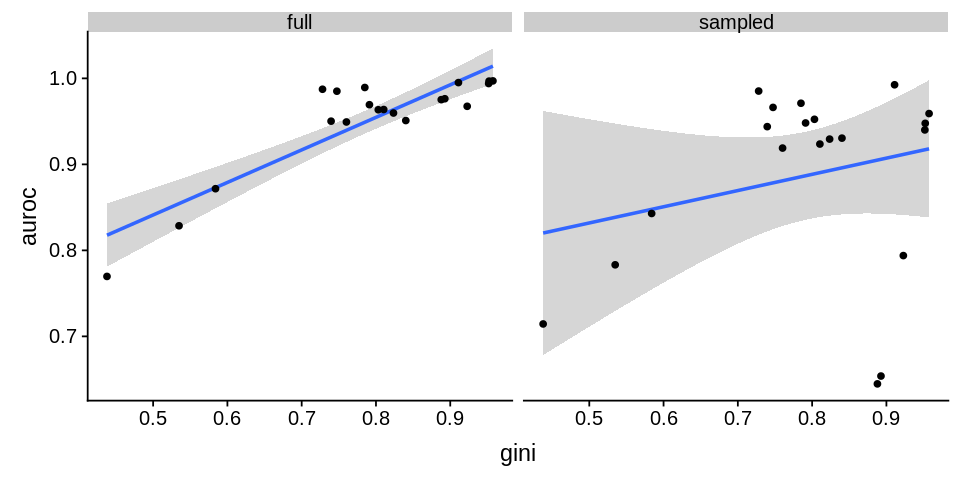

In [14]:
options(repr.plot.width=8, repr.plot.height=4)

metrics %>%
filter(feature == 'xswap_prior' & network != 'other') %>%
left_join(network_size, by = 'metaedge') %>%
ggplot(aes(x = gini, y = auroc)) +
geom_smooth(method = 'lm') +
geom_point() +
facet_wrap(vars(network))

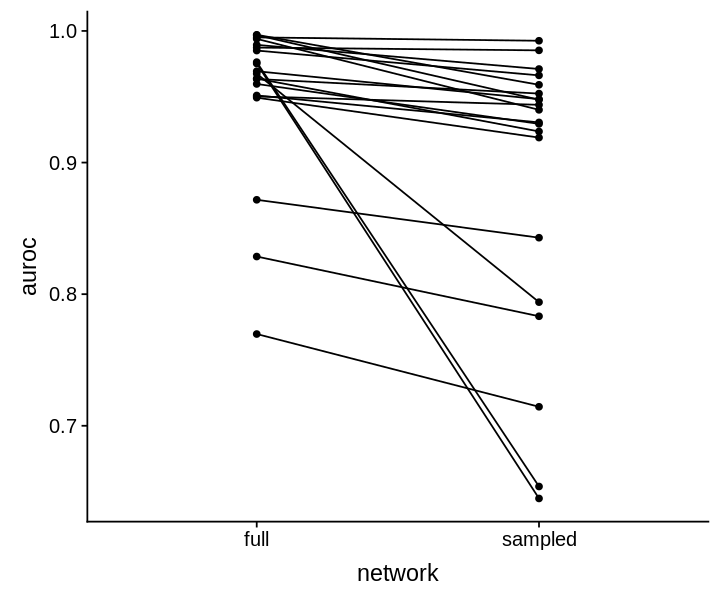

In [15]:
options(repr.plot.width=6, repr.plot.height=5)

metrics %>%
filter(feature == 'xswap_prior', network != 'other') %>%
mutate(network = network %>% factor(levels = c('full', 'sampled'))) %>%
ggplot(aes(x = network, y = auroc, group = metaedge)) +
geom_point() +
geom_line()

In [16]:
metrics %>%
filter(feature == 'xswap_prior', network != 'other') %>%
select(metaedge, network, feature, auroc) %>%
mutate(network = network %>% recode_factor(full = "unsampled", sampled = "sampled")) %>%
spread(network, auroc) %>%
arrange(desc(unsampled))

metaedge,feature,unsampled,sampled
<chr>,<chr>,<dbl>,<dbl>
CdG,xswap_prior,0.9970633,0.9590738
CuG,xswap_prior,0.9967989,0.9477101
G<rG,xswap_prior,0.9950927,0.9925501
CbG,xswap_prior,0.9939756,0.9400423
AdG,xswap_prior,0.9893918,0.9710808
AeG,xswap_prior,0.9873503,0.9852495
AuG,xswap_prior,0.9850801,0.9662363
DuG,xswap_prior,0.9763132,0.6538778
DdG,xswap_prior,0.9752456,0.6447831


## Feature correlation

In [18]:
corr_df <- read_tsv('hetionet_feature_correlation.tsv')
corr_df %>% head

Parsed with column specification:
cols(
  metaedge = col_character(),
  network = col_character(),
  xswap_analytic = col_double(),
  xswap_degree = col_double()
)


metaedge,network,xswap_analytic,xswap_degree
<chr>,<chr>,<dbl>,<dbl>
AdG,full,0.9999946,0.9999936
AeG,full,0.9844830,0.9844673
AlD,full,0.9978761,0.9978691
AuG,full,0.9999975,0.9999972
BPpG,full,0.9999246,0.9999259
CCpG,full,0.9999409,0.9999554


In [19]:
# Summarize how correlated features are
corr_df %>%
    gather('pair', 'correlation', xswap_analytic, xswap_degree) %>%
    summarize_at(.vars = 'correlation', .funs = c('min' = min, 'median' = median, 'max' = max))

min,median,max
<dbl>,<dbl>,<dbl>
0.9844673,0.9999657,0.9999992


In [20]:
# Summarize how similar the features AUROC values are
metrics %>%
    select(network, metaedge, feature, auroc) %>%
    spread(feature, auroc) %>%
    mutate(max_diff = max(abs(c(analytic_prior - scaled_degree, 
                                analytic_prior - xswap_prior, 
                                scaled_degree - xswap_prior)))) %>%
    summarize(max(max_diff))

max(max_diff)
<dbl>
0.02658526


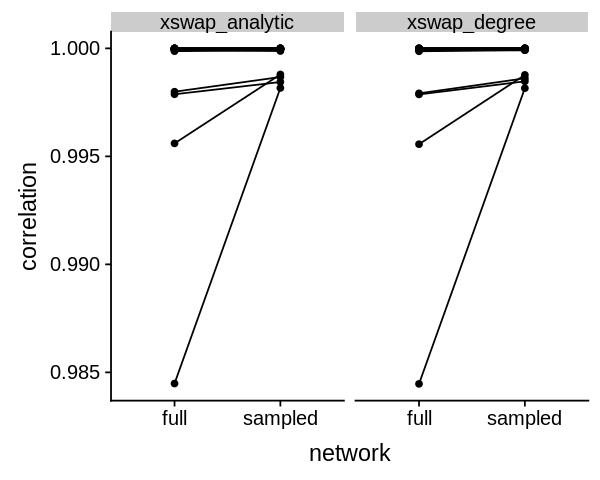

In [21]:
# Are the features any less correlated in the sampled network?
corr_df %>%
    gather('pair', 'correlation', starts_with('xswap')) %>%
#     spread('network', 'correlation') %>%
    ggplot(aes(x = network, y = correlation, group = metaedge)) + 
    geom_point() +
    geom_line() +
    facet_wrap(vars(pair))